In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_26531_I')

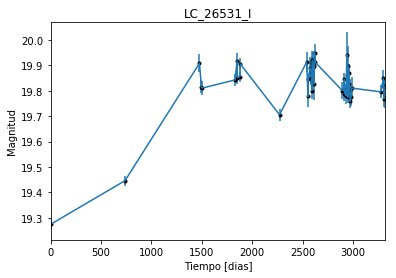

In [2]:
data = np.genfromtxt('LC_26531_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_26531_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

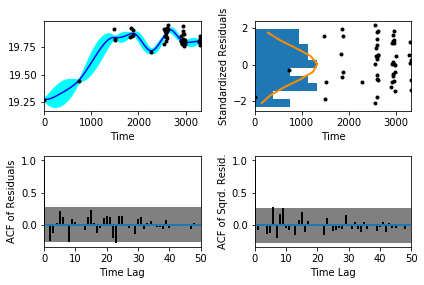

In [5]:
sample.assess_fit()

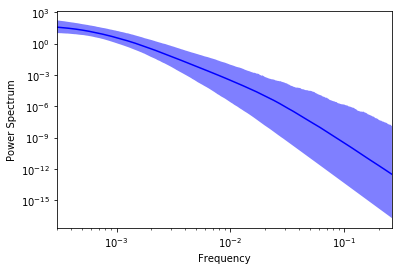

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_26531_I')

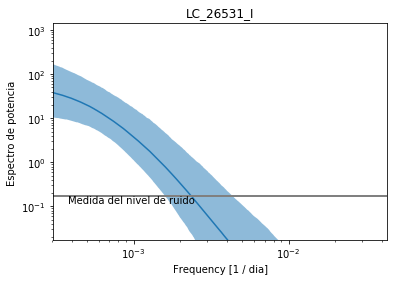

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_26531_I')

Text(0.5,1,'Prediccion , valor esperado LC_26531_I')

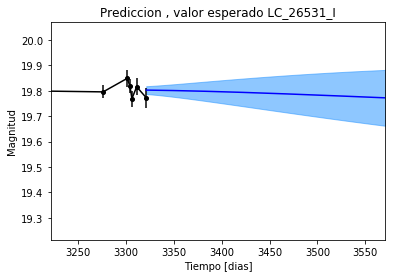

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_26531_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_26531_I')

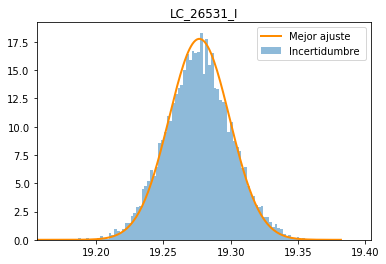

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_26531_I')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_I')

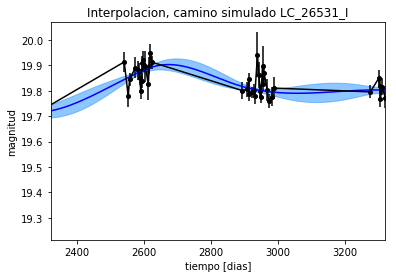

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_I')


Text(0.5,1,'Interpolacion, camino simulado LC_26531_I')

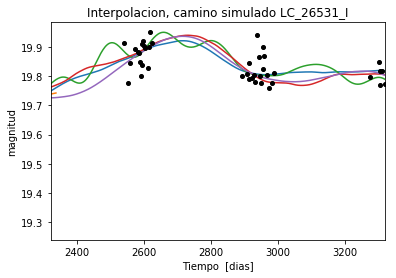

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 269.522245052
Median: 0.010962068527
Standard deviation: 0.114606168498
68% credibility interval: [ 0.00084424  0.15775058]
95% credibility interval: [  3.42440919e-04   4.24388104e-01]
99% credibility interval: [  3.07704231e-04   5.03875432e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 734.869199348
Median: 0.000695888715466
Standard deviation: 0.0396543174732
68% credibility interval: [ 0.00036744  0.00634916]
95% credibility interval: [ 0.00030892  0.09840301]
99% credibility interval: [  3.02845069e-04   3.07047218e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 366.396795756
Median: 0.00581657696641
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1198.09268547
Median: 98.0943473024
Standard deviation: 1.59383761303
68% credibility interval: [ 96.27194431  99.19488823]
95% credibility interval: [ 93.64493448  99.76095274]
99% credibility interval: [ 91.74899125  99.9431353 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 487.952609634
Median: 0.446366642816
Standard deviation: 1.01471453528
68% credibility interval: [ 0.05440695  1.9142198 ]
95% credibility interval: [ 0.01290513  3.39533303]
99% credibility interval: [ 0.0096899   4.61525612]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 497.49764108
Median: 0.0458987549776
Standard deviation: 1.56018249826
68% credibility interval: [ 0.00387022  0.58884596]
95% credibility interval: [  4.22404492e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1210.96533861
Median: 1.94159318797e-28
Standard deviation: 1.75957193561e+87
68% credibility interval: [  6.87798035e-50   2.95435124e-09]
95% credibility interval: [  4.75619535e-69   4.68489174e+00]
99% credibility interval: [  2.49551838e-76   4.70982316e+22]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2657.49077015
Median: 19.6505112132
Standard deviation: 0.151892486119
68% credibility interval: [ 19.51333858  19.77264707]
95% credibility interval: [ 19.3251447   19.94248869]
99% credibility interval: [ 19.13570031  20.11965223]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 228.32943437
Median: 0.0
Standard deviation: 0.0852794449199
68% credibility interval: [ 0.          0.05276031]
95% credibility interval: [ 0.          0.33261364]
99% credibility interval: [ 0.          0.48788097]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 228.32943437
Median: 0.0
Standard deviation: 0.0852794449199
68% credibility interval: [ 0.          0.05276031]
95% credibility interval: [ 0.          0.33261364]
99% credibility interval: [ 0.          0.48788097]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1280.90696186
Median: 0.0
Standard deviation: 0.000180351390597
68% credibility interval: [ 0.

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1198.09268547
Median: 98.0943473024
Standard deviation: 1.59383761303
68% credibility interval: [ 96.27194431  99.19488823]
95% credibility interval: [ 93.64493448  99.76095274]
99% credibility interval: [ 91.74899125  99.9431353 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 850.822485238
Median: 0.0603092379396
Standard deviation: 0.0670626980632
68% credibility interval: [ 0.03446503  0.11992419]
95% credibility interval: [ 0.02118178  0.24374073]
99% credibility interval: [ 0.01639812  0.41651847]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1775.59950354
Median: 1.15091029435
Standard deviation: 0.17859510481
68% credibility interval: [ 0.99242931  1.33952011]
95% credibility interval: [ 0.86744541  1.57535404]
99% credibility interval: [ 0.79337021  1.71548985]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2614.49909695
Median: 4.49704790385e-06
Standard deviation: 0.000670386330006
68% credibility interval: [  3.05488784e-07   6.91989761e-05]
95% credibility interval: [  2.47337669e-08   7.50579759e-04]
99% credibility interval: [  5.10431271e-24   2.62620071e-03]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 269.522245052
Median: (-0.0688767079051+0j)
Standard deviation: 0.89757578466
68% credibility interval: [-0.99117614+0.j         -0.00530449-0.22097824j]
95% credibility interval: [ -2.66650910e+00+0.j          -2.15161975e-03-0.00277534j]
99% credibility interval: [ -3.16594271e+00+0.j          -1.93336271e-03-0.00063739j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 734.869199348
Median: (-0.00437239775245+0j)
Standard deviation: 0.59092175722
68% credibility interval: [-0.03989292+0.16777262j -0.00230871+0.j        ]
95% credibility interval: [-0.61828434+0.95272847j -0.00194101+0.00213362j]
99% credibility interval: [ -1.92923457e+00+3.0758106j  -1.90283169e-03+0.j       ]
Posterior summary for parameter ar_root